<a href="https://colab.research.google.com/github/bandido007/Learning-by-Building/blob/main/Diabetes2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building is the best way of learning . This is first of the many models that i am going to create , which is the Logistic model that uses the Diabetes dataset of Pima Indian Women to classify and predict their probability of them having diabetes based on the given features from the dataset.**












In [2]:
from google.colab import files
uploaded = files.upload()

import copy ,math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn.model_selection import train_test_split


Saving diabetes2.csv to diabetes2.csv


In [3]:
#load the csv file using Pandas
data = pd.read_csv(io.BytesIO(uploaded['diabetes2.csv']))

In [4]:
#check the first 5 rows
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
#get the columns available in our dataset
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
#assigning the necessary features to x
x=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values

In [7]:
#check for the dimension for the x
print('x shape', x.shape)

x shape (768, 8)


In [8]:
#checking for the dimension of y
y=data['Outcome'].values

print('y shape', y.shape )

y shape (768,)


The scatter plots show the relationships between various independent features and the target label (Outcome) for diabetes. Each point represents an individual, with the x-coordinate showing the value of a particular feature and the y-coordinate indicating the diabetes outcome (0 for no diabetes, 1 for diabetes).

for instance in graph of outcome vs glucose ,
  - Glucose has a strong positive correlation with the outcome .hence higher glucose levels are associated with more positive diabetes outcomes.

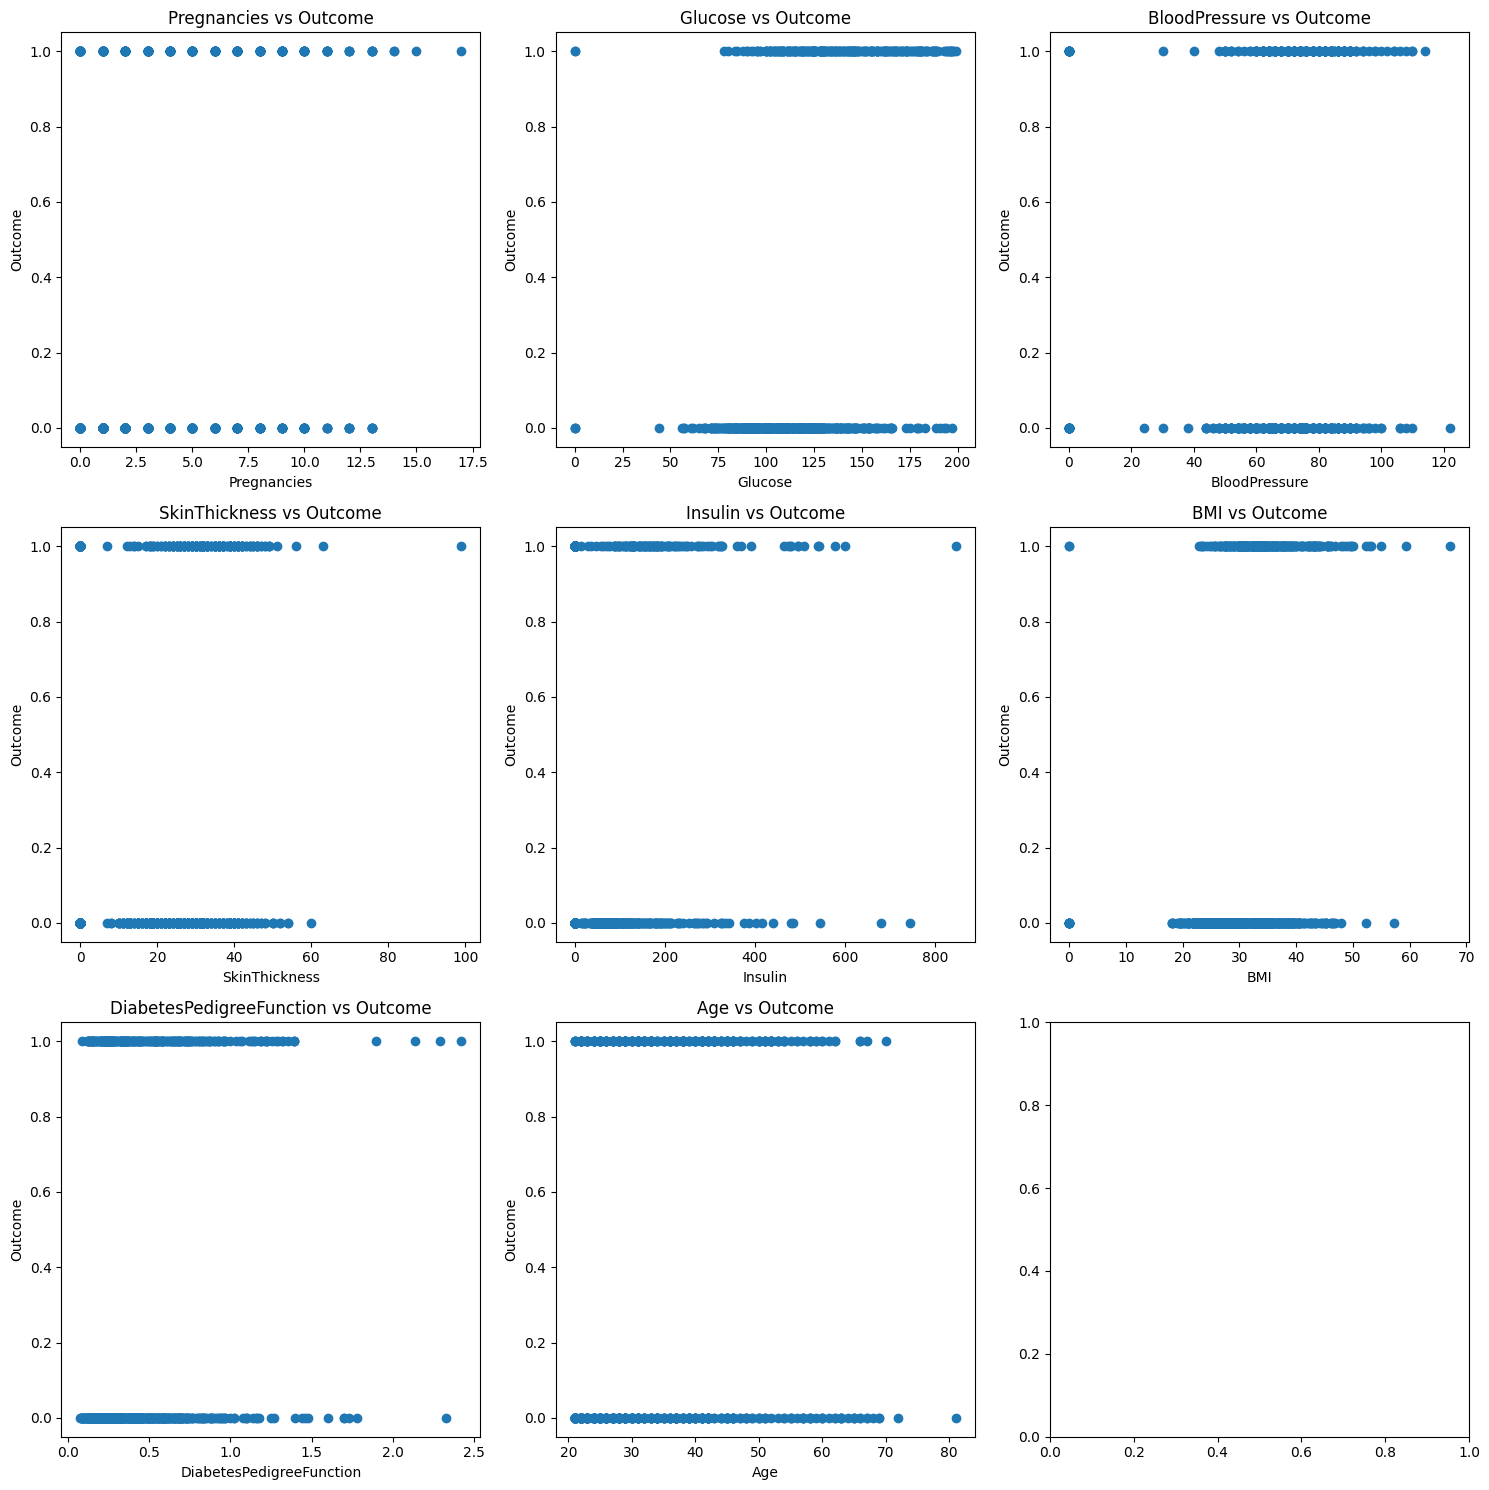

In [11]:
# Create a figure and axes
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()


for i, col in enumerate(data.columns[:-1]):
    axs[i].scatter(data[col], data['Outcome'])
    axs[i].set_title(f'{col} vs Outcome')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Outcome')


plt.tight_layout()
plt.show()

In [14]:
# split the datasets into train and test

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size= 0.3, random_state= 42)

print('type of x train',type(x_train), '\n' , 'x shape', x_train.shape)
print('type of y train',type(y_train),  '\n' , 'y shape', y_train.shape)
print('type of x test',type(x_test),  '\n' , 'x shape', x_test.shape)
print('type of y test',type(y_test) ,  '\n' , 'y shape', y_test.shape)

type of x train <class 'numpy.ndarray'> 
 x shape (537, 8)
type of y train <class 'numpy.ndarray'> 
 y shape (537,)
type of x test <class 'numpy.ndarray'> 
 x shape (231, 8)
type of y test <class 'numpy.ndarray'> 
 y shape (231,)


In [ ]:
print(x_train)

[[  1.     95.     60.    ...  23.9     0.26   22.   ]
 [  5.    105.     72.    ...  36.9     0.159  28.   ]
 [  0.    135.     68.    ...  42.3     0.365  24.   ]
 ...
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.     96.    ...  22.5     0.262  21.   ]]


In [ ]:
x_exp = np.exp (x)

print('x as exponent', x_exp)

x as exponent [[4.03428793e+02 1.88618081e+64 1.85867175e+31 ... 3.91106102e+14
  1.87198619e+00 5.18470553e+21]
 [2.71828183e+00 8.22301271e+36 4.60718663e+28 ... 3.56642601e+11
  1.42048733e+00 2.90488497e+13]
 [2.98095799e+03 2.99150814e+79 6.23514908e+27 ... 1.31541088e+10
  1.95814971e+00 7.89629602e+13]
 ...
 [1.48413159e+02 3.54513118e+52 1.85867175e+31 ... 2.39064685e+11
  1.27762131e+00 1.06864746e+13]
 [2.71828183e+00 5.26144118e+54 1.14200739e+26 ... 1.18103809e+13
  1.41764919e+00 2.58131289e+20]
 [2.71828183e+00 2.45124554e+40 2.51543867e+30 ... 1.59423467e+13
  1.37025931e+00 9.74480345e+09]]


<ipython-input-14-225b42bbece1>:1: RuntimeWarning: overflow encountered in exp
  x_exp = np.exp (x)


In [15]:
#sigmoid function

def sigmoid(z):

    g = 1 / (1 + np.exp(-z))

    return g

Each plot shows the sigmoid function (in red) overlaid with data points (in blue) for a specific feature. The sigmoid function is fundamental in logistic regression as it maps the linear combination of input features to a probability value between 0 and 1. the x axis represents the values of the features , this is the input to the sigmoid function
y axis represesnts the output of the sigmoid function which is the predicted probability. the values ranges from 0 to 1.

example :
   sigmoid (z) vs BMI , here the display show that the higher the Body Mass Index (BMI) values correlate with high probabilities(1) which indicates the possibility of diabetes to victims with higher values of Body Mass Index.
   

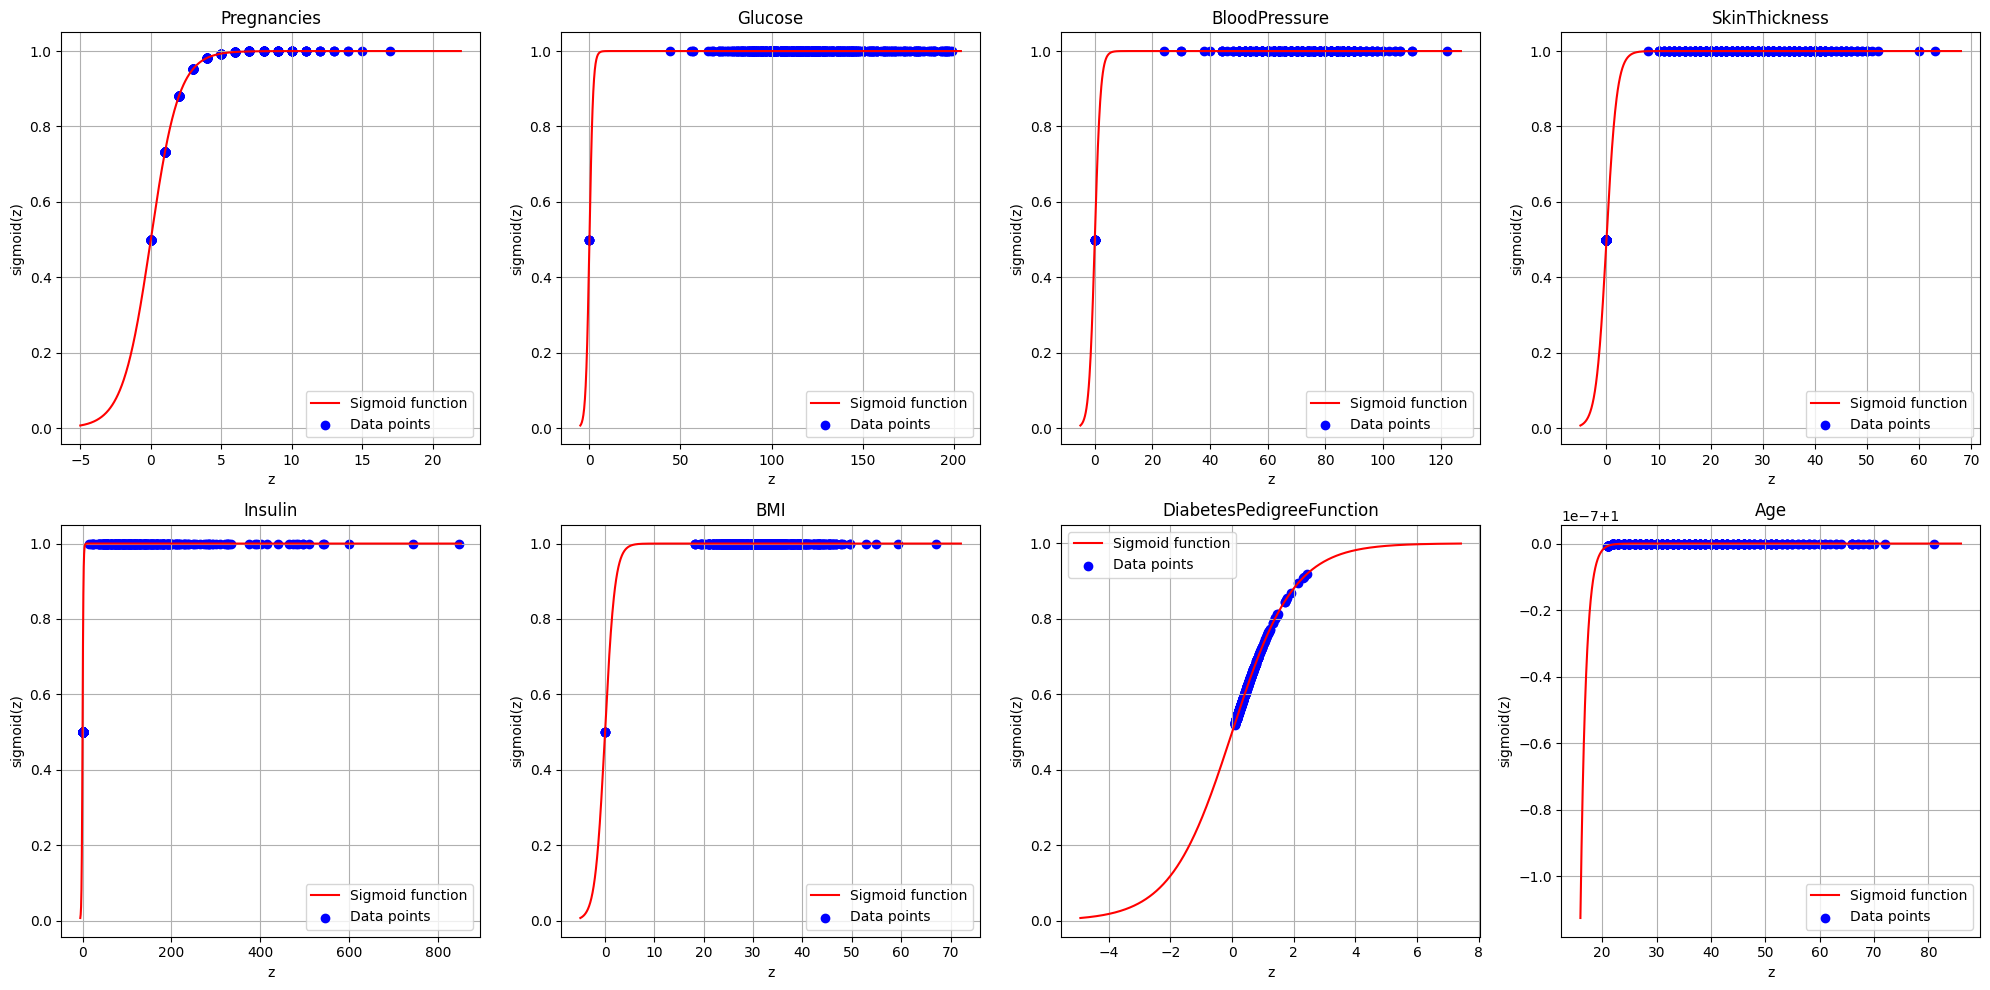

In [17]:
#plot z vs sigmoid(z)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Iterate over the number of features (columns)
for i in range(x_train.shape[1]):
    z_tmp = x_train[:, i]
    g_init = sigmoid(z_tmp)

    # Plot sigmoid function
    x_range = np.linspace(min(z_tmp)-5, max(z_tmp)+5, 1000)
    axs[i].plot(x_range, sigmoid(x_range), 'r-', label='Sigmoid function')

    # Plot data points
    axs[i].scatter(z_tmp, g_init, c='blue', label='Data points')

    axs[i].set_title(cols[i]) # Set title to column name
    axs[i].set_ylabel('sigmoid(z)')
    axs[i].set_xlabel('z')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

now we are going to calculate the cost for the logistic regression

In [18]:
def compute_cost_logistic(x,y,w,b):
  """
    Args:
        x: Input features, a numpy array of shape (m, n) where m is the number of examples and n is the number of features.
        y: True labels, a numpy array of shape (m,) where m is the number of examples.
        w: Weights, a numpy array of shape (n,) where n is the number of features.
        b: Bias, a scalar.

    Returns:
        cost: The cost (loss) for logistic regression, a scalar.
    """

  m= x.shape[0]
  cost = 0.0

  for i in range (m): #loop for all examples

    z_i = np.dot(x[i],w) + b # calculates the linear combination of input features and weighs + the bias .

    fwb_i= sigmoid(z_i) #computing the sigmoid function to our z_i


    cost= cost + ((-y[i]*np.log(fwb_i)) - ((1-y[i]*np.log(1-fwb_i))))  #cost function

  cost = cost/m
  return cost

here the tends to call the compute_cost_logistic function with the training data x_train and y_train, the initialized weights w, and the bias b in order to calculate the cost of the logistic regression.

In [19]:
w = np.zeros(x_train.shape[1])
b=0

cost = compute_cost_logistic(x_train,y_train, w,b)

print ('cost', cost , 'w: ', w , 'b',b)

cost -1.0 w:  [0. 0. 0. 0. 0. 0. 0. 0.] b 0


This function calculates the gradients of the cost function with respect to the weights and bias for logistic regression. Gradients are used in optimization algorithms like gradient descent to update the weights and bias.

In [20]:
def compute_gradient_logistic(x,y,w,b):
    """
    Args:
        x: Input features, a numpy array of shape (m, n) where m is the number of examples and n is the number of features.
        y: True labels, a numpy array of shape (m,) where m is the number of examples.
        w: Weights, a numpy array of shape (n,) where n is the number of features.
        b: Bias, a scalar.

    Returns:
        dw: Gradient of the cost function with respect to weights, a numpy array of shape (n,).
        db: Gradient of the cost function with respect to bias, a scalar.
    """

  m= x.shape[0]
  dw = np.zeros(w.shape)
  db = 0.0

  for i in range (m):
    z_i = np.dot(x[i],w) + b

    fwb_i= sigmoid(z_i)
    dw += (fwb_i - y[i]) * x[i]
    db += (fwb_i - y[i])

  dw = dw/m
  db = db/m

  return dw,db


we are coing to call the compute_gradient_logistic function to calculate the gradients of the logistic regression cost function with respect to the weights and bias, and then prints these gradients.

In [ ]:
dw_tmp , db_tmp = compute_gradient_logistic(x_train,y_train,w,b)

print('db:', db_tmp , 'dw :', dw_tmp)


db: 0.14990689013035383 dw : [ 0.25232775 10.74115456  9.47765363  2.6405959   4.53817505  3.61722533
  0.04617225  3.39944134]


This function performs gradient descent to optimize the weights (w) and bias (b) of a logistic regression model. here the weights and bias are initialized then they are to be iteratively computed so as to get the optimized weights and bias .

In [ ]:
def gradient_descent(x,y,w_init,b_init,alpha,num_iters):
    """
    Args:
        x: Input features, a numpy array of shape (m, n) where m is the number of examples and n is the number of features.
        y: True labels, a numpy array of shape (m,) where m is the number of examples.
        w_init: Initial weights, a numpy array of shape (n,) where n is the number of features.
        b_init: Initial bias, a scalar.
        alpha: Learning rate, a scalar that controls the step size in the gradient descent updates.
        num_iters: Number of iterations for gradient descent.

    Returns:
        w: Optimized weights after gradient descent, a numpy array of shape (n,).
        b: Optimized bias after gradient descent, a scalar.
        J_history: List of cost values during training, one for each iteration.
        w_history: List of first weight values during training, for visualization.
        b_history: List of bias values during training, for visualization.
    """
  w = copy.deepcopy(w_init)
  b = b_init
  J_history = []
  w_history = []
  b_history = []

  for i in range(num_iters):
    dw,db = compute_gradient_logistic(x,y,w,b)
    w = w - alpha * dw
    b = b - alpha * db

    if i < 100000:
        J_history .append(compute_cost_logistic(x,y,w,b))
        w_history.append(w[0])
        b_history.append(b)


    if i%math.ceil(iterations/10)==0:
         print(f'iteration {i:4d}: cost {J_history[-1]}')

  return w,b,J_history,w_history,b_history

we are going to set up and execute the gradient descent but the most important features that to be included are aplha and iterations .

This code sets up and executes gradient descent for a machine learning model, likely a linear regression or logistic regression. Let's break it down:

alpha = 9e-5: This sets the learning rate (also called step size) to 0.00009. The learning rate determines how large of a step the algorithm takes in the direction of the gradient during each iteration.
iterations = 100000: This sets the number of times the gradient descent algorithm will update the parameters.

alpha (learning rate):
This is a crucial hyperparameter in gradient descent. It determines the size of the steps taken during optimization.
If alpha is too small, convergence will be slow.
If it's too large, the algorithm might overshoot the minimum and fail to converge.
The value 9e-5 (0.00009) is quite small, suggesting that the problem might be sensitive to parameter changes or that the feature scales are large.

iterations:
This parameter sets how many times the gradient descent algorithm will update the parameters.

More iterations allow the algorithm more opportunities to refine the parameters, potentially leading to a better solution.
However, too many iterations can lead to overfitting or unnecessary computation if the algorithm has already converged.






In [ ]:
alpha=9e-5
iterations=100000

w_init = np.zeros(x_train.shape[1])
b_init = 0.0

w,b,J_history, w_history, b_history  = gradient_descent(x_train,y_train,w_init,b_init,alpha,iterations)

print('w',w,'b',b)

iteration    0: cost -0.9059952063007973
iteration 10000: cost -0.9199648090752663
iteration 20000: cost -0.9217779025934996
iteration 30000: cost -0.9228674077024456
iteration 40000: cost -0.923780994961089
iteration 50000: cost -0.9246484830652127
iteration 60000: cost -0.9255017858152901
iteration 70000: cost -0.9263488114336695
iteration 80000: cost -0.9271915238894161
iteration 90000: cost -0.9280304126415657
w [ 0.08256987  0.01317936 -0.03026854 -0.00414624  0.0007911   0.00332709
  0.01859035 -0.00079749] b -0.34831432242632854


visualizatin of the convergence of the cost functio during the gradient descent optimization process.

  X-axis (Iterations): Represents the number of iterations of the gradient descent algorithm.
  Y-axis (Cost): Represents the value of the cost function at each iteration.
  Plot: Shows how the cost function decreases over time, indicating the convergence of the gradient descent algorithm


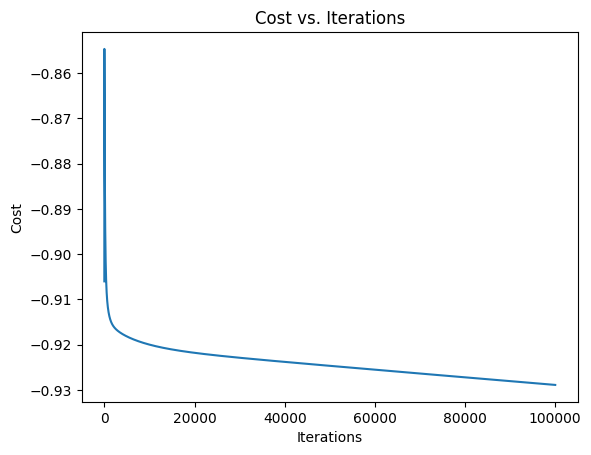

In [ ]:
plt.plot(range(len(J_history)), J_history
         )
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

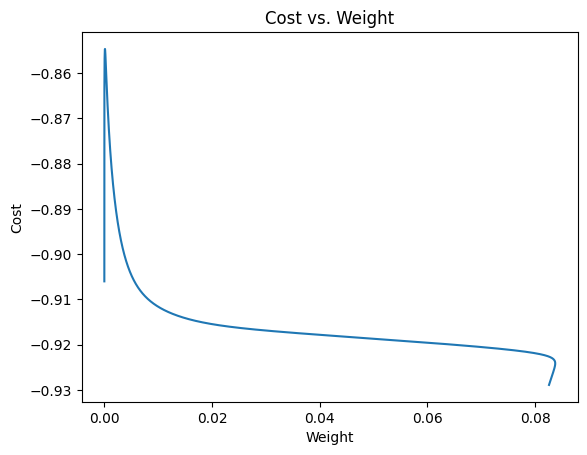

In [ ]:
# Plot J vs w
plt.plot(w_history, J_history)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.title('Cost vs. Weight')
plt.show()

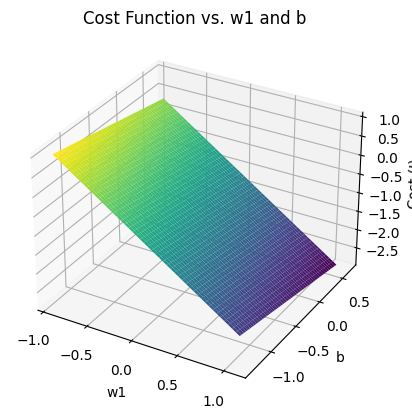

In [ ]:
# Range of values for w1 and b
w1_range = np.linspace(w[0] - 1, w[0] + 1, 50)
b_range = np.linspace(b - 1, b + 1, 50)

# Create a meshgrid of w1 and b values
W1, B = np.meshgrid(w1_range, b_range)

# Calculate the cost function for each combination of w1 and b
Z = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w_tmp = np.copy(w)
        w_tmp[0] = W1[i, j]
        Z[i, j] = compute_cost_logistic(x_train, y_train, w_tmp, B[i, j])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, B, Z, cmap='viridis')
ax.set_xlabel('w1')
ax.set_ylabel('b')
ax.set_zlabel('Cost (J)')
plt.title('Cost Function vs. w1 and b')
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_pred and y_test are already defined as in your code

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.35064935064935066
Precision: 0.34782608695652173
Recall: 1.0
F1-score: 0.5161290322580645
Confusion Matrix:
 [[  1 150]
 [  0  80]]


In [ ]:
def compute_cost_logistic_reg(x,y,w,b,lambda_):
  """

  Args:
    x:
    y:
    w:
    b:
    lambda_:

  Returns:

  """
  m,n= x.shape
  cost = 0.0
  grad_w = np.zeros(w.shape)
  grad_b = 0.0

  for i in range (m):

    z_i = np.dot(x[i],w) + b

    fwb_i= sigmoid(z_i)

    cost += -y[i] * np.log(fwb_i) - (1-y[i]) * np.log(1-fwb_i)

  cost= cost/m

  reg_cost=0

  for j in range(n):
    reg_cost += w[j]**2

  reg_cost = (lambda_/(2*m))*reg_cost

  cost += reg_cost


  return cost

In [ ]:
w_tmp = np.zeros(x_train.shape[1])
b_tmp=0
x_tmp = x_train
y_tmp = y_train
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(x_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6931471805599468


In [ ]:
def compute_gradient_logistic_reg(x,y,w,b,lambda_):
  """

  Args:
    x:
    y:
    w:
    b:
    lambda_:

  Returns:
"""

  m,n= x.shape
  dw=np.zeros((n,))
  db=0

  for i in range(m):
    err= (np.dot(x[i],w)+b - y[i])

    for j in range(n):
      dw[j] += err * x[i,j]

    db += err
  dw = dw/m
  db = db/m

  for j in range(n):
    dw[j] += (lambda_/m)*w[j]

  return dw,db




In [ ]:
w_tmp = np.zeros(x_train.shape[1])
b_tmp=0
x_tmp = x_train
y_tmp = y_train
lambda_tmp = 0.7
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic_reg(x_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: -0.3500931098696462
Regularized dj_dw:
 [-1.6108007448789572, -49.68342644320298, -25.364990689013034, -7.575418994413408, -35.37988826815643, -12.370577281191808, -0.18878770949720677, -13.13780260707635]


In [ ]:
def gradient_descent_reg(x,y,w_init,b_init,alpha,num_iters,lambda_):
  """

  Args:
    x:
    y:
    w_init:
    b_init:
    alpha:
    num_iters:
    lambda_:

  Returns:

  """
  w = copy.deepcopy(w_init)
  b = b_init
  J_history = []
  w_history = []
  b_history = []

  for i in range(num_iters):
    dw,db = compute_gradient_logistic_reg(x,y,w,b,lambda_)
    w = w - alpha * dw
    b = b - alpha * db
    J_history.append(compute_cost_logistic_reg(x,y,w,b,lambda_))

    w_history.append(w)
    b_history.append(b)


    if i%math.ceil(iterations/10)==0:
         print(f'iteration {i:4d}: cost {J_history[-1]}')

  return w,b,J_history,w_history, b_history

In [ ]:
alpha=3e-5
iterations=100000

w_init = np.zeros(x_train.shape[1])
b_init = 0.0

w,b,J_history, w_history, b_history  = gradient_descent_reg(x_train,y_train,w_init,b_init,alpha,iterations,lambda_tmp)


print('w',w,'b',b)

iteration    0: cost 0.7421846022170462
iteration 10000: cost 0.7336058538657192
iteration 20000: cost 0.7331229015505234
iteration 30000: cost 0.7327900512580562
iteration 40000: cost 0.7324760550023193
iteration 50000: cost 0.7321666962580369
iteration 60000: cost 0.7318603893377631
iteration 70000: cost 0.7315569332515627
iteration 80000: cost 0.7312562794174435
iteration 90000: cost 0.73095839636855
w [ 1.49203786e-02  3.84475567e-03 -4.83746230e-03 -6.18551997e-04
  8.40639429e-05  6.20345598e-03  1.09131373e-02  2.13871624e-03] b -0.07676145014702908


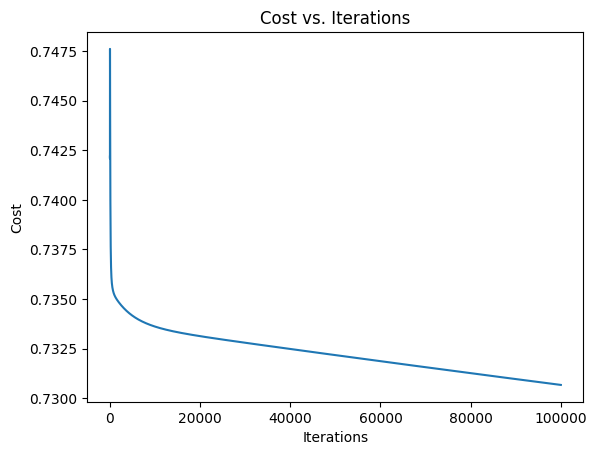

In [ ]:
plt.plot(range(len(J_history)), J_history
         )
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [ ]:
y_pred = sigmoid(np.dot(x_test, w) + b)
y_pred = (y_pred >= 0.5).astype(int)
print(y_pred)

acc = (y_pred == y_test).mean()
print(acc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
0.35064935064935066


In [ ]:
# prompt: i want to evaluate my model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_pred and y_test are already defined as in your code

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.35064935064935066
Precision: 0.34782608695652173
Recall: 1.0
F1-score: 0.5161290322580645
Confusion Matrix:
 [[  1 150]
 [  0  80]]
